## documentation

explication des normes pour le parsing de durèe : https://stackoverflow.com/questions/51168022/what-does-pt-prefix-stand-for-in-duration <br>
lien du dataset de base : https://www.kaggle.com/datasets/dilwong/flightprices

In [1]:
# import pour exploitation de donnée
import pandas as pd
import requests
import urllib.parse
import datetime

# import pour les graphs / data vis
import folium
import matplotlib.pyplot as plt
import seaborn as sns

#import pour la stylisation
from IPython.display import HTML, display

In [2]:
FlightData = pd.read_csv('itineraries.csv', nrows= 500000)

In [3]:
FlightData.head()

,legId,searchDate,flightDate,startingAirport,destinationAirport,fareBasisCode,travelDuration,elapsedDays,isBasicEconomy,isRefundable,...,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
0,9ca0e81111c683bec1012473feefd28f,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H29M,0,False,False,...,1650223560,2022-04-17T15:26:00.000-04:00,BOS,ATL,Delta,DL,Airbus A321,8940,947,coach
1,98685953630e772a098941b71906592b,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H30M,0,False,False,...,1650200400,2022-04-17T09:00:00.000-04:00,BOS,ATL,Delta,DL,Airbus A321,9000,947,coach
2,98d90cbc32bfbb05c2fc32897c7c1087,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H30M,0,False,False,...,1650218700,2022-04-17T14:05:00.000-04:00,BOS,ATL,Delta,DL,Boeing 757-200,9000,947,coach
3,969a269d38eae583f455486fa90877b4,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H32M,0,False,False,...,1650227460,2022-04-17T16:31:00.000-04:00,BOS,ATL,Delta,DL,Airbus A321,9120,947,coach
4,980370cf27c89b40d2833a1d5afc9751,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H34M,0,False,False,...,1650213180,2022-04-17T12:33:00.000-04:00,BOS,ATL,Delta,DL,Airbus A321,9240,947,coach


In [4]:
FlightData = FlightData.drop('searchDate', axis=1)

## mapping des Airoports

Récupperation des airoports et génération d'une carte pour visualiser nos points d'arriver et de départ. <br>
<br>
Le mapping c'est fait en deux parties :
- On a récupperé les codes AITA des aéroports qui sont des codes propres à chaque aéroport pour les différencier donc chaque code AITA est unique à son aéroport.
- On a retrouver les coordonées gps de chauque lieu que nous avons de notre base de donnée grace a l'API de openstreetmap. <br>
Ces deux étapes nous a permis de placer nos location sur une map constriute par folium.

In [5]:
# On retrouve toutes nos location de notre BDD grâce a notre csv qui contient nos locations.

def getAllAirports(pd):
    depart = pd.startingAirport.to_list()
    arrived = pd.destinationAirport.to_list()
    Airports = set(depart + arrived)
    #print(Airport)
    return(Airports)

allAirport = getAllAirports(FlightData)

In [6]:
# On trouve la location gps de chaque aéroports de notre base de donné avec API de openstreetmap

def getlocation(Airport):
    url = "https://nominatim.openstreetmap.org/search/" + urllib.parse.quote(Airport) + "?format=json"
    Coord = requests.get(url).json()
    #print(f"les coordoné sont lat :{Coord[0]['lat']} et lon : {Coord[0]['lon']}")
    return(Coord)

#getlocation('BOS')

In [7]:
def createMap(pd) :
    Airports = getAllAirports(pd)
    m = folium.Map(location=[33.63779875,-84.42927118585675], zoom_start=4)
    for Airport in Airports: 
        loc = getlocation(Airport)
        #print(loc[0]['lat'])
        #print(loc[0]['lon'])
        if Airport == 'SFO' :
            folium.Marker(
                [loc[1]['lat'], loc[1]['lon']], popup=f"<i>{Airport}</i>"
            ).add_to(m)
        else:
            folium.Marker(
                [loc[0]['lat'], loc[0]['lon']], popup=f"<i>{Airport}</i>"
            ).add_to(m)
    return(m)

m = createMap(FlightData)
m

Voila notre première carte de nos aéroports. <br>
Nous pouvons voir une valeur abérante étant celle de DEN qui sont censé être respectivement aéroport international de Denver et  Effectivement cette valeur n'est pas place au bon endroit, elle est placé au Nord de l'Italie alors qu'elle devrait se situer dans les USA.

<div class="alert alert-block alert-danger">  
<b>Warning :</b> Decomenter la ligne si dessous seulement en cas de reset majeur  
</div>

In [8]:
del m

In [9]:
def createCorrectMap(pd) :
    Airports = getAllAirports(pd)
    m = folium.Map(location=[33.63779875,-84.42927118585675], zoom_start=4)
    for Airport in Airports: 
        loc = getlocation(Airport)
        #print(loc[0]['lat'])
        #print(loc[0]['lon'])
        if Airport == 'SFO' or Airport == 'DEN' :
            folium.Marker(
                [loc[1]['lat'], loc[1]['lon']], popup=f"<i>{Airport}</i>"
            ).add_to(m)
        else:
            folium.Marker(
                [loc[0]['lat'], loc[0]['lon']], popup=f"<i>{Airport}</i>"
            ).add_to(m)
    return(m)

m = createCorrectMap(FlightData)
m

Ici nous demandons de prendre les deuxièmes valeur pour les valeur "SFO" et "DEN" vu que avec l'API de openstreetmap SFO et DEN font référence a des lieux autres que les aéroports qui nous intérésse.

## visualisation de la repartition des arrivés

on vérifie que on a bien le même nombre de départ et d'arrivé.

In [10]:
FlightData.destinationAirport.count()

500000

In [11]:
FlightData.startingAirport.count()

500000

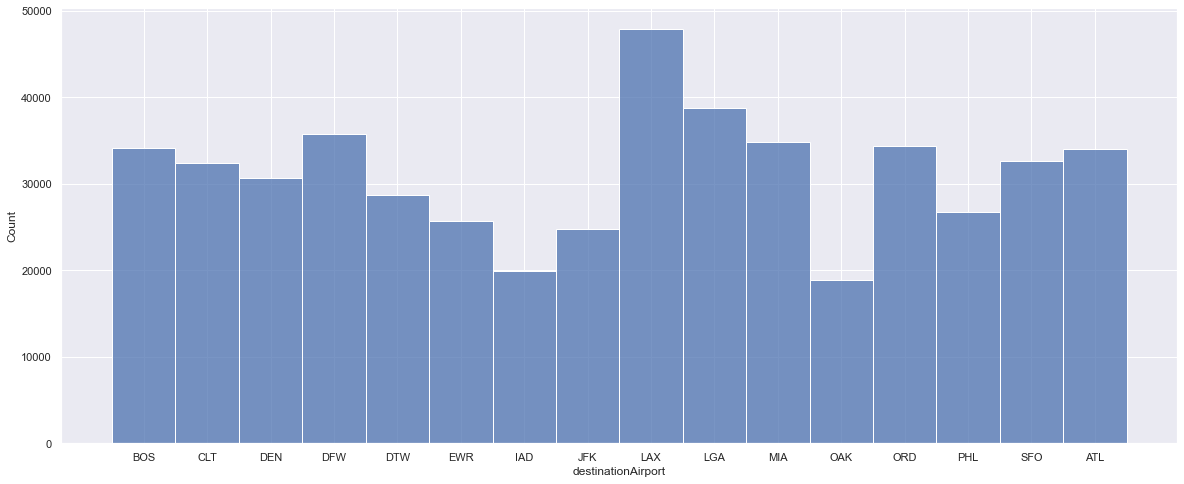

In [12]:
sns.set(style="darkgrid", rc= {'figure.figsize':(20,8)})
sns.histplot(FlightData.destinationAirport, discrete=True, binwidth=5)

plt.show()

On peut voir que deux aéroports sort de la moyen. <br>
Les trois destination les plus fréquenter sont LAX, LGA soit :  <br>
- L'aéroport de Los Angeles  <br>
- L'aéroport international de La Guardia

In [13]:
FlightData.travelDuration[0]

'PT2H29M'

On fait des tests pour voir comment réagie la fonction mean() avec des élèments de type DateType. <br>
et la moyen à l'air de se faire bien car entre une durée d'une heure et une durée de 30 min. On tombe sur 45 min ce qui est le résultat qu'on attend. <br>
On peut donc utiliser la fonction sans problème.

In [14]:
day1 = pd.Timedelta('PT1H00M')
day2 = pd.Timedelta('PT0H30M')
temp = pd.DataFrame({"Duration" : [day1, day2]})

In [15]:
temp

,Duration
0,0 days 01:00:00
1,0 days 00:30:00


In [16]:
tempMean =temp.mean()
tempMean

Duration   0 days 00:45:00
dtype: timedelta64[ns]

On effectue un groupby sur les aéroports d'arrivées et de départs pour voir les temps moyens des vols entre chaque destination. On peut donc se faire une idée sur les trajets. <br>
La prochaine étape est de mettre ces information sur une map grace a folium où le peut visualisé les vols et un moyen de visualisé leur durée.

In [17]:
FlightData.travelDuration = FlightData.travelDuration.apply(pd.Timedelta)

In [18]:
FlightData

,legId,flightDate,startingAirport,destinationAirport,fareBasisCode,travelDuration,elapsedDays,isBasicEconomy,isRefundable,isNonStop,...,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
0,9ca0e81111c683bec1012473feefd28f,2022-04-17,ATL,BOS,LA0NX0MC,0 days 02:29:00,0,False,False,True,...,1650223560,2022-04-17T15:26:00.000-04:00,BOS,ATL,Delta,DL,Airbus A321,8940,947,coach
1,98685953630e772a098941b71906592b,2022-04-17,ATL,BOS,LA0NX0MC,0 days 02:30:00,0,False,False,True,...,1650200400,2022-04-17T09:00:00.000-04:00,BOS,ATL,Delta,DL,Airbus A321,9000,947,coach
2,98d90cbc32bfbb05c2fc32897c7c1087,2022-04-17,ATL,BOS,LA0NX0MC,0 days 02:30:00,0,False,False,True,...,1650218700,2022-04-17T14:05:00.000-04:00,BOS,ATL,Delta,DL,Boeing 757-200,9000,947,coach
3,969a269d38eae583f455486fa90877b4,2022-04-17,ATL,BOS,LA0NX0MC,0 days 02:32:00,0,False,False,True,...,1650227460,2022-04-17T16:31:00.000-04:00,BOS,ATL,Delta,DL,Airbus A321,9120,947,coach
4,980370cf27c89b40d2833a1d5afc9751,2022-04-17,ATL,BOS,LA0NX0MC,0 days 02:34:00,0,False,False,True,...,1650213180,2022-04-17T12:33:00.000-04:00,BOS,ATL,Delta,DL,Airbus A321,9240,947,coach
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,0a284910acef8eddf73d226e1221721b,2022-06-03,CLT,DFW,XAVNA0BC,0 days 04:19:00,0,True,False,False,...,1654304460||1654315380,2022-06-03T21:01:00.000-04:00||2022-06-03T23:0...,ATL||DAL,CLT||ATL,Delta||Delta,DL||DL,Boeing 717||Boeing 717,4620||7980,228||725,coach||coach
499996,f9f9db3a8eaaa6f88ad7875d92ca82f1,2022-06-03,CLT,DFW,XAVNA0BC,0 days 05:39:00,1,True,False,False,...,1654304460||1654320180,2022-06-03T21:01:00.000-04:00||2022-06-04T00:2...,ATL||DFW,CLT||ATL,Delta||Delta,DL||DL,Boeing 717||Airbus A321,4620||8040,228||725,coach||coach
499997,03b67bedfa77864725fa03378f646d6d,2022-06-03,CLT,DFW,SUAIZON1,0 days 02:36:00,0,False,False,True,...,1654285560,2022-06-03T14:46:00.000-05:00,DFW,CLT,American Airlines,AA,Airbus A321,9360,930,coach
499998,1dfbb2a05865a47593463f8d757fbf71,2022-06-03,CLT,DFW,SUAIZON1,0 days 02:39:00,0,False,False,True,...,1654303140,2022-06-03T19:39:00.000-05:00,DFW,CLT,American Airlines,AA,Airbus A321,9540,930,coach


In [19]:
flightMean = FlightData[["destinationAirport", "travelDuration", "startingAirport"]].groupby(["destinationAirport", "startingAirport"]).mean()
flightMean

travelDuration
destinationAirport startingAirport                          
ATL                BOS             0 days 06:02:21.047120418
                   CLT             0 days 04:33:11.816578483
                   DEN             0 days 06:14:52.073039742
                   DFW             0 days 04:28:55.957031250
                   DTW             0 days 06:13:26.862611073
...                                                      ...
SFO                LGA             0 days 10:40:13.219022969
                   MIA             0 days 11:38:58.787210584
                   OAK             0 days 07:28:24.117168429
                   ORD             0 days 07:47:07.916666666
                   PHL             0 days 10:13:53.622183708

[234 rows x 1 columns]

In [20]:
locationData = flightMean.reset_index()

In [21]:
locationData.travelDuration

0     0 days 06:02:21.047120418
1     0 days 04:33:11.816578483
2     0 days 06:14:52.073039742
3     0 days 04:28:55.957031250
4     0 days 06:13:26.862611073
                 ...           
229   0 days 10:40:13.219022969
230   0 days 11:38:58.787210584
231   0 days 07:28:24.117168429
232   0 days 07:47:07.916666666
233   0 days 10:13:53.622183708
Name: travelDuration, Length: 234, dtype: timedelta64[ns]

In [22]:
locationDict = {}
for tmp in allAirport :
    location = getlocation(tmp)
    if tmp == 'SFO' or tmp == 'DEN':
        locationDict[tmp] = (float(location[1]['lat']), float(location[1]['lon']))
    else:
        locationDict[tmp] = (float(location[0]['lat']), float(location[0]['lon'])) 


In [23]:
locationDict

{'BOS': (42.36317665, -71.01364006269452),
 'PHL': (39.875018, -75.23521278969667),
 'DTW': (42.205699100000004, -83.35297537621658),
 'EWR': (40.68906405, -74.17725485035348),
 'LAX': (33.94216754999999, -118.42135906141587),
 'SFO': (37.622451999999996, -122.38398938548363),
 'IAD': (38.95226625, -77.4534849116007),
 'JFK': (40.642947899999996, -73.7793733748521),
 'ATL': (33.63779875, -84.42927118585675),
 'ORD': (41.97795725, -87.90920910980722),
 'CLT': (35.21074145, -80.9457435226013),
 'LGA': (40.7757145, -73.87336398511545),
 'DFW': (32.89651945, -97.0465220537124),
 'MIA': (40.0580258, -84.2236524),
 'OAK': (37.72225915, -122.21701661553246),
 'DEN': (39.8606676, -104.68536732610298)}

In [24]:
#del FlightData

In [25]:
durations = flightMean.travelDuration

In [26]:
def itineriesColor(duration):
        if duration <= datetime.timedelta(hours=5):
            return("#41e84f")#vert
        elif duration > datetime.timedelta(hours=5) and duration <= datetime.timedelta(hours=7):
            return("#512ed1")#bleu
        elif duration > datetime.timedelta(hours=7) and duration <= datetime.timedelta(hours=9):
            return("#ebe015")#
        elif duration > datetime.timedelta(hours=9) and duration <= datetime.timedelta(hours=11):
            return("#d95a30")
        else:
            return("#b03f3f")

#t =itineriesColor(durations[5])

In [27]:
#m = folium.Map(location=[33.63779875,-84.42927118585675], zoom_start=4)

starting = locationData.startingAirport.to_list()
destination = locationData.destinationAirport.to_list()
durations = flightMean.travelDuration
for start_, desti_, dura_ in zip(starting, destination, durations):
    trail_coordinates = [
    locationDict[start_], locationDict[desti_]
    ]
    folium.PolyLine(trail_coordinates, tooltip=f"flight from {start_} to {desti_} and took: {dura_}", color=itineriesColor(dura_), opacity=0.5).add_to(m)

In [28]:
m

In [67]:
def converstion(DF):
    save = DF.travelDuration.total_seconds() / 3600
    return save

C:\Users\filou\AppData\Local\Temp\ipykernel_56788\3202051269.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["durationHour"]= tmp.apply(lambda x: converstion(x), axis=1)
C:\Users\filou\AppData\Local\Temp\ipykernel_56788\3202051269.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["X"] = [elm for elm in range(1, nbline+1)]


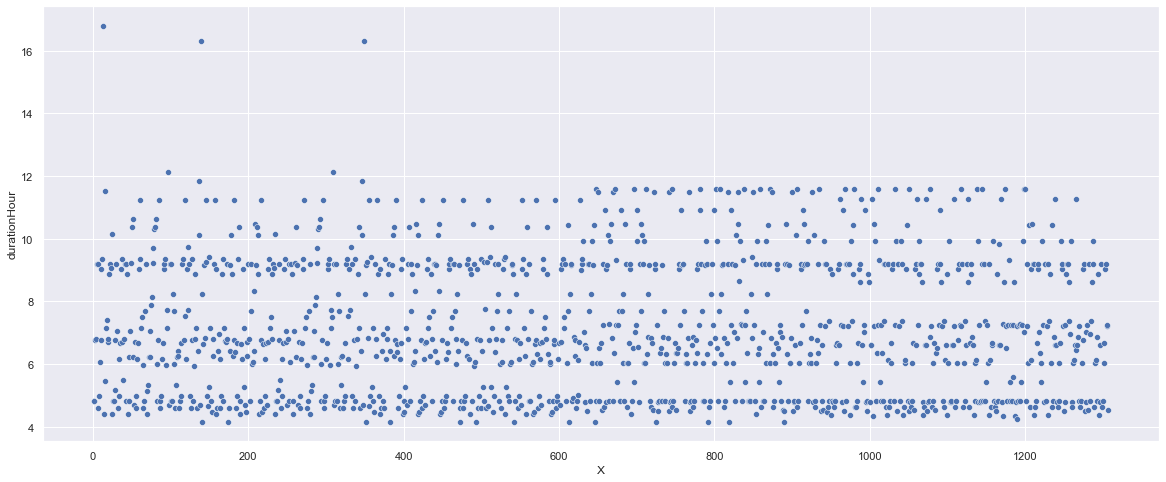

In [87]:
def scatterPointFlight(startingPoint, destination):
    tmp = FlightData[((FlightData["startingAirport"]==startingPoint) & (FlightData["destinationAirport"]==destination))]
    tmp["durationHour"]= tmp.apply(lambda x: converstion(x), axis=1)
    nbline = tmp.shape[0]
    tmp["X"] = [elm for elm in range(1, nbline+1)]
    sns.scatterplot(data =tmp, x="X", y="durationHour")
    #return tmp

scatterPointFlight("SFO", "OAK")

In [85]:
def howManySegment(DF):
    segment = DF.segmentsDepartureAirportCode.split("||")
    return len(segment)

C:\Users\filou\AppData\Local\Temp\ipykernel_56788\3753091049.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Escaled["durationHour"]= Escaled.apply(lambda x: converstion(x), axis=1)
C:\Users\filou\AppData\Local\Temp\ipykernel_56788\3753091049.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Escaled["nbsegment"]= Escaled.apply(lambda x: howManySegment(x), axis=1)
C:\Users\filou\AppData\Local\Temp\ipykernel_56788\3753091049.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

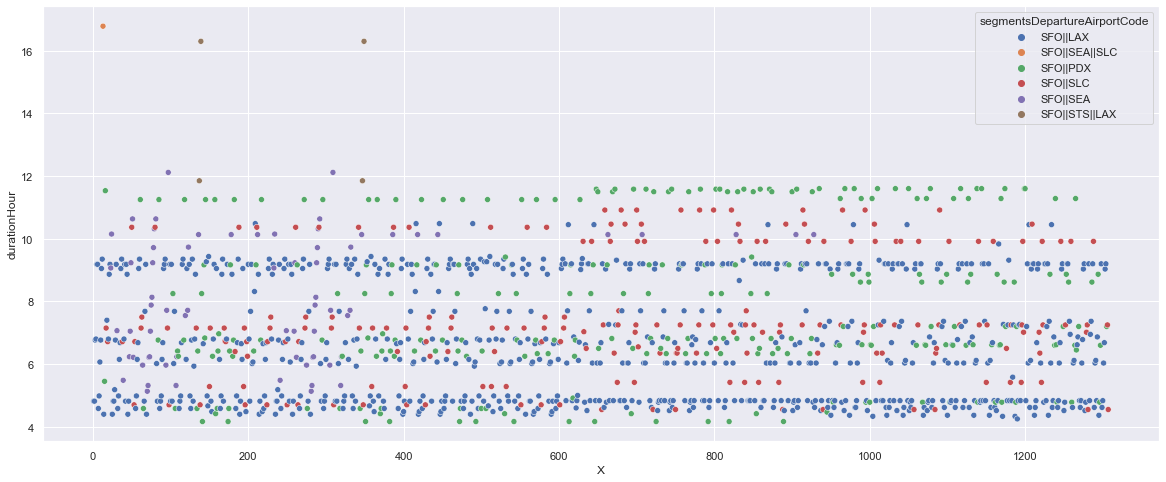

In [94]:
def scatterPointFlightwithEscaled(startingPoint, destination):
    Escaled = FlightData[((FlightData["startingAirport"]==startingPoint) & (FlightData["destinationAirport"]==destination))]
    Escaled["durationHour"]= Escaled.apply(lambda x: converstion(x), axis=1)
    Escaled["nbsegment"]= Escaled.apply(lambda x: howManySegment(x), axis=1)
    nbline = Escaled.shape[0]
    Escaled["X"] = [elm for elm in range(1, nbline+1)]
    sns.scatterplot(data=Escaled, x="X", y="durationHour", hue="segmentsDepartureAirportCode")
    #return Escaled

scatterPointFlightwithEscaled("SFO", "OAK")

Comme on peut le remaquer il n'y a aucun vols direct entre San Francisco et Oakland. Le temps moyen de trajet d'une durée de 7 heures malgré une distance si petite vient de ce point la.<br> Vu que tout les vols se font avec une escale au minimum la durée du trajet a forcément une importance plus importante que celle reporté sur la map car nous avons fait le choix de ne pas tracer toutes les parties du vols pour garder une clareté sur la map. <br>
On peut voir une certaine corélation entre les différentes escales on commence par une ligne bleu puis vient les point vert et on fini par la couleur rouge. <br><br>
Le fait d'avoir trois vagues pourrait s'expliquer par le fait que dependant des horrair les vols n'aflue pas avec autant d'importance on pourrait croire que en millieu de journée les vols s'enchaine la où le matin ou bien le soir il y a moins de vols donc une attente plus longue entre chaque vols. 

C:\Users\filou\AppData\Local\Temp\ipykernel_56788\3753091049.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Escaled["durationHour"]= Escaled.apply(lambda x: converstion(x), axis=1)
C:\Users\filou\AppData\Local\Temp\ipykernel_56788\3753091049.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Escaled["nbsegment"]= Escaled.apply(lambda x: howManySegment(x), axis=1)
C:\Users\filou\AppData\Local\Temp\ipykernel_56788\3753091049.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

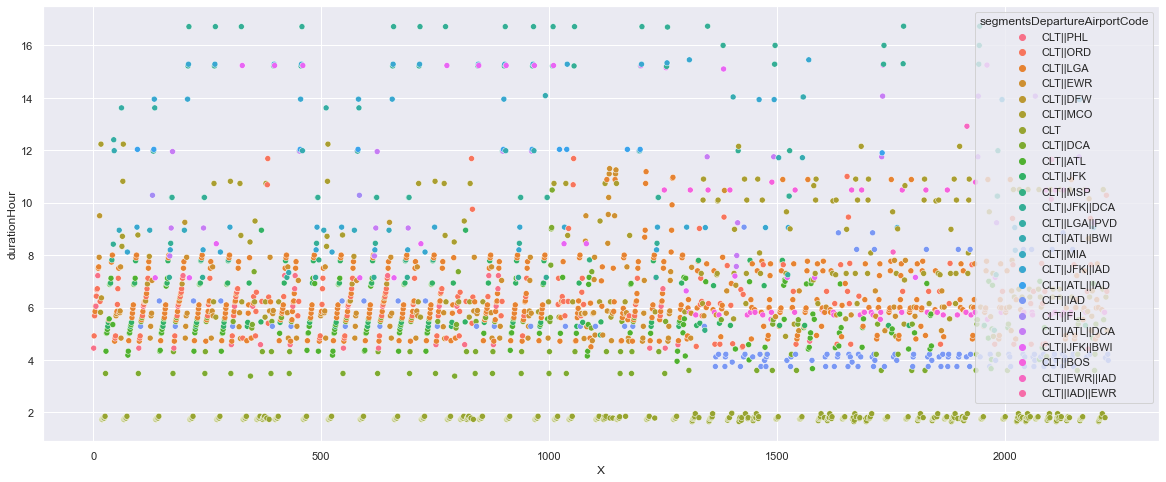

In [98]:
scatterPointFlightwithEscaled("CLT", "DTW")

C:\Users\filou\AppData\Local\Temp\ipykernel_56788\3753091049.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Escaled["durationHour"]= Escaled.apply(lambda x: converstion(x), axis=1)
C:\Users\filou\AppData\Local\Temp\ipykernel_56788\3753091049.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Escaled["nbsegment"]= Escaled.apply(lambda x: howManySegment(x), axis=1)
C:\Users\filou\AppData\Local\Temp\ipykernel_56788\3753091049.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

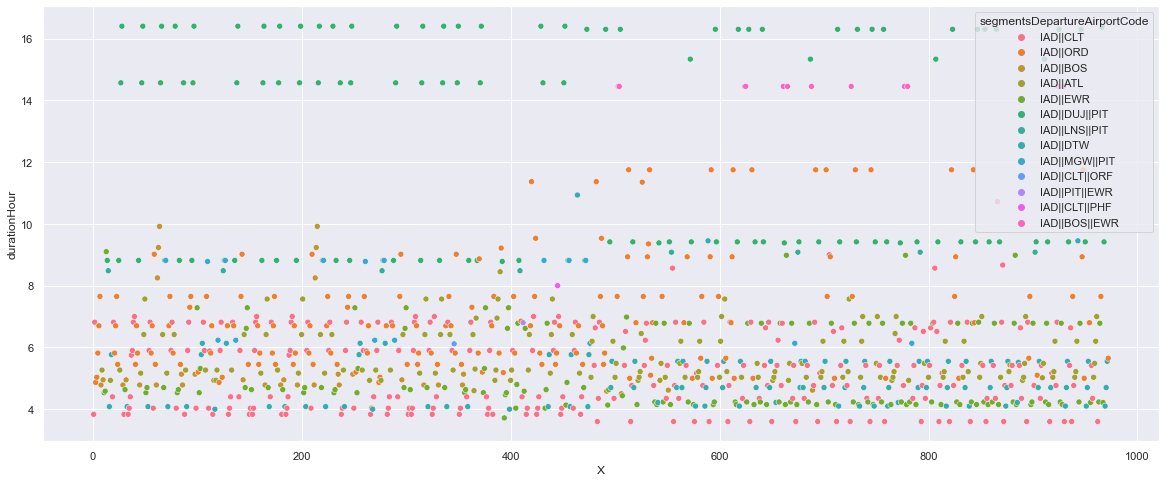

In [99]:
scatterPointFlightwithEscaled("IAD", "PHL")

Encore une fois malgrè le fait que les deux villes sont proche l'une de l'autre, on a une durée de 6 heures venant du fait qu'il n'y pas de vols direct entre les deux villes.<br>
Sinon la plus part des vols prennent environs 6 Heure se qui correspond a ce qui retransmis sur notre carte. <br>
Il y a effectivement des vols qui dure plus de 16h mais ce sont des vols qui font escales qui les éloigne plus de leurs destinations qu'elle ne les rapproches.